In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
# input from txt
file=open("data.txt","r")
x_train=np.empty(1)
y_train=np.empty(1)

for i in file.readlines():
    if " " in i:
        valori = i.split()
        valori = list(map(lambda x: int(x),valori))
        y_train=np.append(y_train, valori[0])
        x_train=np.append(x_train, valori[1:])
x_train = x_train[1:]
y_train = y_train[1:]
x_train = x_train.reshape(-1,6)
y_train = y_train.reshape(-1,1)

print(x_train, y_train)

[[615. 536. 236.  49.   8.   0.]
 [608. 561. 209.  60.   6.   0.]
 [620. 537. 236.  45.   5.   1.]
 ...
 [595. 574. 229.  42.   3.   1.]
 [596. 573. 235.  32.   7.   1.]
 [578. 519. 197.  40.   7.   0.]] [[44.]
 [43.]
 [42.]
 ...
 [ 3.]
 [ 2.]
 [ 1.]]


## Linear regression

In [55]:
class MyLinearRegression:
    def __init__(self):
        # define the parameters of the model (weights and biases)
        self.w = torch.tensor([0.], requires_grad=True)
        self.b = torch.tensor([0.], requires_grad=True)
        
    def forward(self, x):
        # implement forward computation - compute predictions based on the inputs
        return self.w * x + self.b
    
    def parameters(self):
        # this function should return a list of parameters of the model
        return [self.w, self.b]
    
    def __call__(self, x):
        # convenience function
        return self.forward(x)
    

def mselossfunc(pred, y):
    # implement the MSE loss function
    return (pred - y).pow(2).mean()

model = MyLinearRegression()
numpy_inputs = np.asarray([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype=np.float32)
torch_inputs = torch.from_numpy(numpy_inputs)
torch_outputs = model(torch_inputs)
print("Testing model: an input of %s gives a prediction:\n %s" % (torch_inputs, torch_outputs))

Testing model: an input of tensor([0., 1., 2., 3., 4., 5.]) gives a prediction:
 tensor([0., 0., 0., 0., 0., 0.], grad_fn=<AddBackward0>)


In [56]:
def train(features, labels, model, lossfunc, optimizer, num_epoch):

    for epoch in range(num_epoch):
        # create torch variables corresponding to features and labels
        inputs = torch.from_numpy(features)
        targets = torch.from_numpy(labels)

        # Step 2 - compute model predictions and loss
        outputs = model(inputs)
        loss = lossfunc(outputs, targets)
        
        # Step 3 - do a backward pass and a gradient update step
        optimizer.zero_grad()  
        loss.backward()
        optimizer.step()
        
        if epoch % 50 == 0:
            print ('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epoch, loss.item()))
        
        
def visualize(x_train, y_train, model):
    # convenience function for visualizing predictions given by the model

    predicted = model(torch.from_numpy(x_train)).data.numpy()
    order = np.argsort(x_train, axis=0)
    plt.plot(x_train[order].flatten(), y_train[order].flatten(), 'ro', label='Original data')
    plt.plot(x_train[order].flatten(), predicted[order].flatten(), label='Fitted line')
    plt.legend()
    plt.show()

Epoch [1/1000], Loss: 7103.2978
Epoch [51/1000], Loss: nan
Epoch [101/1000], Loss: nan
Epoch [151/1000], Loss: nan
Epoch [201/1000], Loss: nan
Epoch [251/1000], Loss: nan
Epoch [301/1000], Loss: nan
Epoch [351/1000], Loss: nan
Epoch [401/1000], Loss: nan
Epoch [451/1000], Loss: nan
Epoch [501/1000], Loss: nan
Epoch [551/1000], Loss: nan
Epoch [601/1000], Loss: nan
Epoch [651/1000], Loss: nan
Epoch [701/1000], Loss: nan
Epoch [751/1000], Loss: nan
Epoch [801/1000], Loss: nan
Epoch [851/1000], Loss: nan
Epoch [901/1000], Loss: nan
Epoch [951/1000], Loss: nan


ValueError: x and y must have same first dimension, but have shapes (173700,) and (28950,)

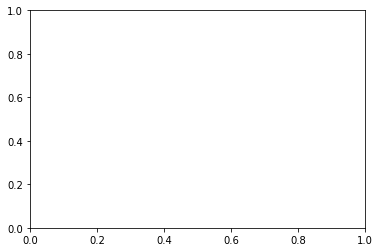

In [57]:
# training and visualizing predictions made by linear regression model
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=mselossfunc, 
      optimizer=optimizer,
      num_epoch=1000)
visualize(x_train, y_train, model)

## Linear Regression (using nn package)

In [41]:
class NNLinearRegression(nn.Module):
    def __init__(self):
        super(NNLinearRegression, self).__init__()
        # define the parameters of the model (linear nn layer)
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        # implement forward computation
        return self.linear(x)
    
# training and visualizing predictions made by linear regression model (nn package)
# use loss function from nn package
lossfunc = nn.MSELoss()

model = NNLinearRegression()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=lossfunc,
      optimizer=optimizer,
      num_epoch=1000)
visualize(x_train, y_train, model)

RuntimeError: Expected object of scalar type Float but got scalar type Double for argument #2 'mat1' in call to _th_addmm

## MLP

In [42]:
class MLP(nn.Module):
    def __init__(self, hidden_size):
        super(MLP, self).__init__()
        # define parameters / layers of a multi-layered perceptron with one hidden layer
        self.fc1 = nn.Linear(1, hidden_size)
        self.activation_fn = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, 1) 
    
    def forward(self, x):
        out = self.fc2(self.activation_fn(self.fc1(x)))
        return out
    
# possibly change learning rate, hidden size, and optimizer type for multi-layered perceptron
hidden_size = 3
learning_rate = 1.5e-1

model = MLP(hidden_size=hidden_size)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train(features=x_train,
      labels=y_train,
      model=model,
      lossfunc=lossfunc,
      optimizer=optimizer,
      num_epoch=300)
visualize(x_train, y_train, model)

RuntimeError: Expected object of scalar type Float but got scalar type Double for argument #2 'mat1' in call to _th_addmm